In [75]:
import pandas as pd
import seaborn as sns #for vis
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
    

In [76]:
train=pd.read_csv("D:\loanPrediction/train_ctrUa4K.csv")
test=pd.read_csv("D:\loanPrediction/test_lAUu6dG.csv")
train_original=train.copy()
test_original=test.copy()
train


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [77]:
#underdstand the data:
test.columns
train.columns
test.dtypes
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Y    422
N    192
Name: Loan_Status, dtype: int64
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


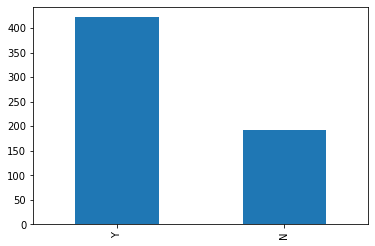

In [78]:
#univariate analysis:
print(train['Loan_Status'].value_counts())
print(train['Loan_Status'].value_counts(normalize=True))#normalized data gets us proportion
train['Loan_Status'].value_counts().plot.bar()

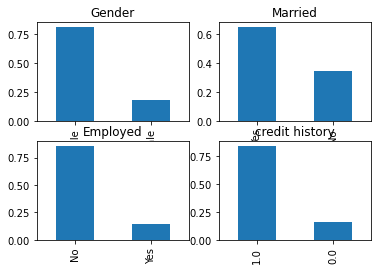

In [79]:
#Independent Variable:
plt.figure(1) 
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
#married:
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')

#employed
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Employed')
#credit_history
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='credit history')
plt.show()


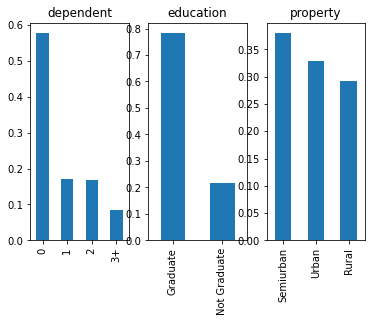

In [80]:
#ordinal (independent)
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(title='dependent')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='property')

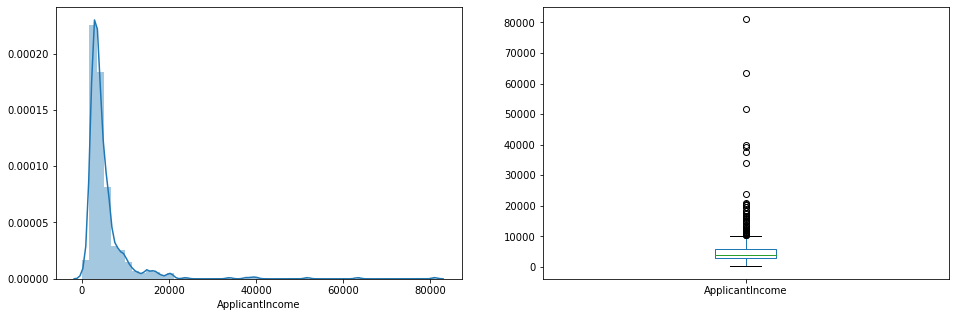

In [81]:
#independent variable (numerical)
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

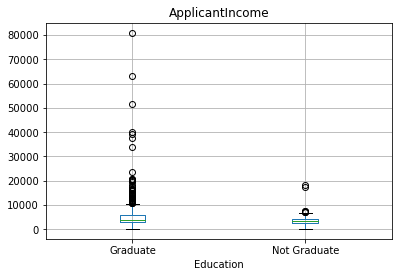

In [82]:
#FROM THE GRAPH THE DATA DOESN'T LOOK NORMAL(applicantIncome)
#
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")


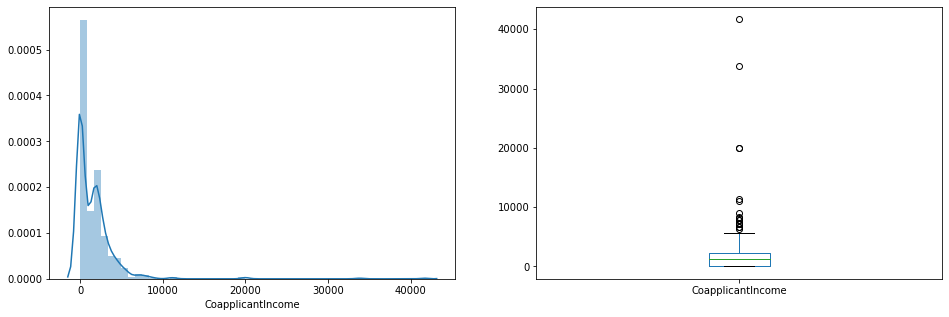

In [83]:
#from above graph there are many graduates with high income 
#coapplicantIncome
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()


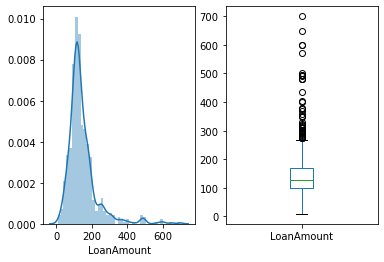

In [84]:
#the above graph the coapplicatnIncome is not distributed as well:
#loan variable:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box()
plt.show()

In [85]:
#from above the data is fairely normal:
#we will use bivariate analysis


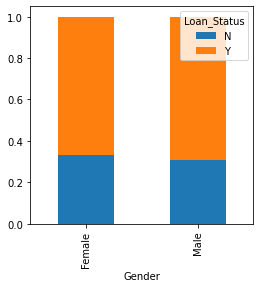

In [86]:

#categorical independent variable vs target variable
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

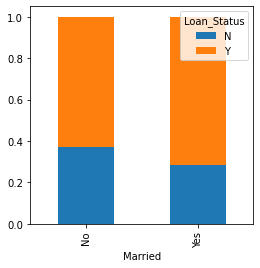

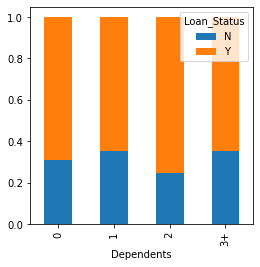

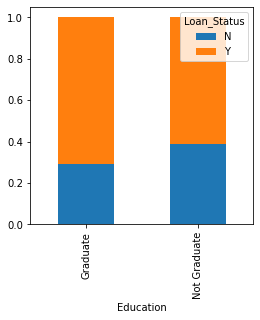

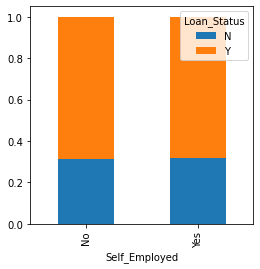

In [87]:
married=pd.crosstab(train['Married'],train['Loan_Status'])
dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
education=pd.crosstab(train['Education'],train['Loan_Status'])
self_employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
married.div(married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
dependents.div(dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
education.div(education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
self_employed.div(self_employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

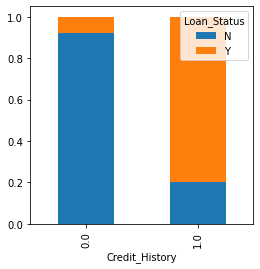

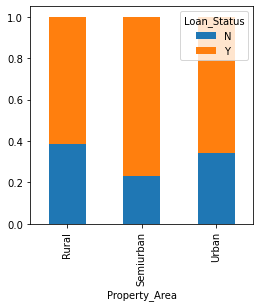

In [88]:
#categorical and loan status:
credit_history=pd.crosstab(train['Credit_History'],train['Loan_Status'])
property_area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
credit_history.div(credit_history.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
property_area.div(property_area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

In [89]:
#from above first graph people with credit history 1 are getting more loan approval
#from graph 2 people in semi urban area are getting more loan approval


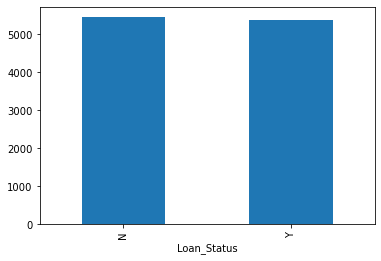

In [90]:
#numerical independent variable vs target variable:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [91]:
#since from above we didnt get any difference .now we make new bins and add new column in train:

bins=[0,2500,4000,6000,81000]; group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
train['Income_bin']

0           High
1           High
2        Average
3        Average
4           High
         ...    
609      Average
610         High
611    Very high
612    Very high
613         High
Name: Income_bin, Length: 614, dtype: category
Categories (4, object): [Low < Average < High < Very high]

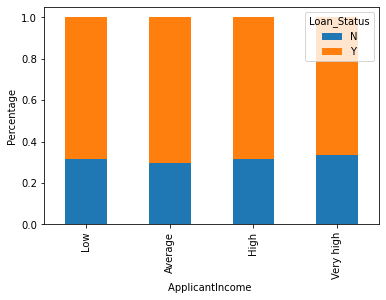

In [92]:
#crosstabs for income_bins:
income_bins=pd.crosstab(train['Income_bin'],train['Loan_Status'])
income_bins.div(income_bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome ')
plt.ylabel('Percentage')
plt.show()


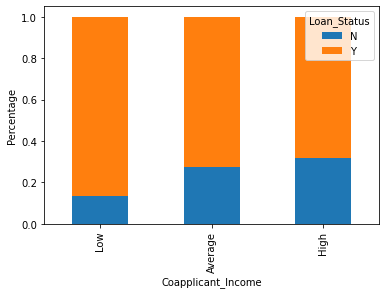

In [93]:
#from above income and loan amount doesn't hold relation:
#check for loan amount and coapplicant income:
bins=[0,1000,3000,4200]; group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Coapplicant_Income')
plt.ylabel('Percentage')
plt.show()



In [94]:
#from above low income shows high percentage which is not right:



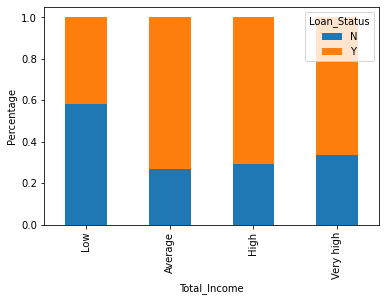

In [95]:
##so we combine applicant and coapplicant income:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,8100]; group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')
plt.show()


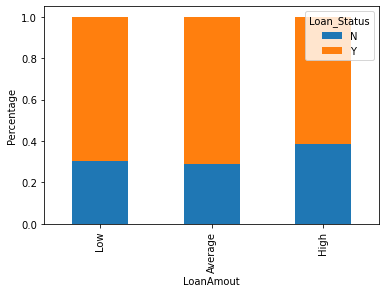

In [96]:
#it shows that low income has low yes for loan:
#visualize the loan amount variable:
bins=[0,100,200,700]; group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
train['LoanAmount_bin']
#crosstab loadamount:
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmout')
plt.ylabel('Percentage')
plt.show()

In [97]:
#from above graph loan yes is high for low loan amount and vice versa.
#we drop all the bin data we created:
train=train.drop(['LoanAmount_bin' ,'Total_Income_bin', 'Coapplicant_Income_bin','Income_bin','Total_Income'],axis=1)


In [98]:
#change the values:
train["Dependents"].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)


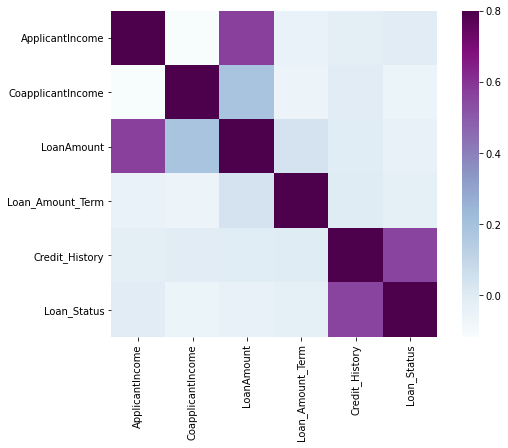

In [99]:
#create matrix and plot corr :
matrix=train.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu')


In [100]:
#from the graph:the most correlated are (credit_history and loan status) and loanAmount and applicantIncome:

#missing values and outlier treatment:
#find missing :
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [101]:
#for categorical we use mode and for numerical we use mean:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train["Married"].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
# for numerical now:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)


In [102]:
#for testSet():
test.isnull().sum()
test['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
#for numerical in  test set:
test['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

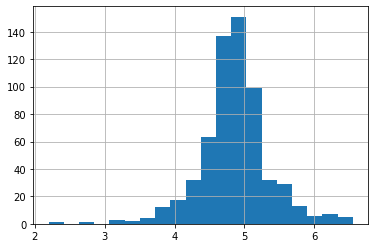

In [103]:
#outlier treatment: we remove the skewness by using the log:
train['LoanAmount_log']=np.log(train['LoanAmount'])
test['LoanAmount_log']=np.log(test["LoanAmount"])
train['LoanAmount_log'].hist(bins=20)
    

In [104]:
#remove the id part:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)
X=train.drop('Loan_Status',axis=1)
y=train.Loan_Status

In [105]:
train=train.drop('Loan_Status',axis=1)

In [106]:
#apply dummies :
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)


In [107]:
#split inot validatino set:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3)



In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,
                   max_iter=100,multi_class='ovr',n_jobs=1,penalty='12',random_state=1,solver='liblinear',
                   tol=0.0001,verbose=0,warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear')

In [109]:
pred_cv=model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8054054054054054

In [110]:
#predict for test:
pred_test=model.predict(test)
#read submission:
submission=pd.read_csv("D:\loanPrediction\sample_submission.csv")

In [111]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [112]:
#convert in 0 and 1:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [113]:
#convert the submission to csv again:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [114]:
#using strtified k fold cross validation techniques:
from sklearn.model_selection import StratifiedKFold
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xval=X.loc[train_index],X.loc[test_index]
    ytr,yval=y[train_index],y[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xval)
    score=accuracy_score(yval,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)
    
    pred=model.predict_proba(xval)[:,1]


1 of kfold5
accuracy_score 0.8048780487804879

2 of kfold5
accuracy_score 0.8373983739837398

3 of kfold5
accuracy_score 0.7804878048780488

4 of kfold5
accuracy_score 0.7886178861788617

5 of kfold5
accuracy_score 0.7950819672131147


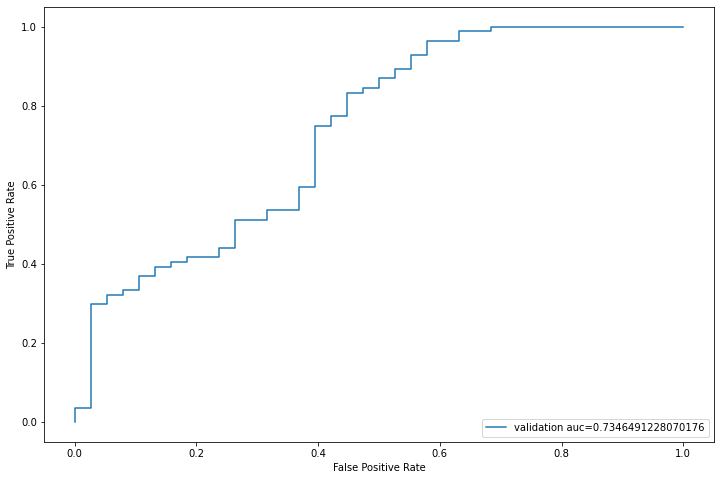

In [115]:
#lest visualize the roc curve:
from sklearn import metrics 
fpr,tpr,_=metrics.roc_curve(yval,pred)
auc=metrics.roc_auc_score(yval,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='validation auc='+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [116]:
#from the above curve we got auc=0.773
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
#convert the status y and n to 0 and 1:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
#convert submission to csv :
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

In [117]:
#feature engineering:
#we will create new feature:
train['Total_Income']=train["ApplicantIncome"]+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

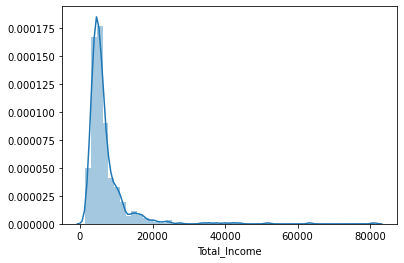

In [118]:
#check the distribution of total income:
sns.distplot(train['Total_Income'])

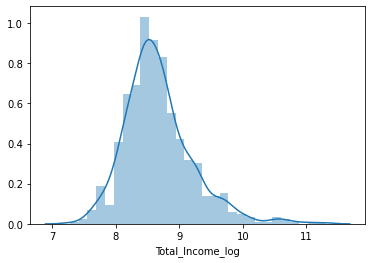

In [119]:
train['Total_Income_log']=np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log']=np.log(test['Total_Income'])


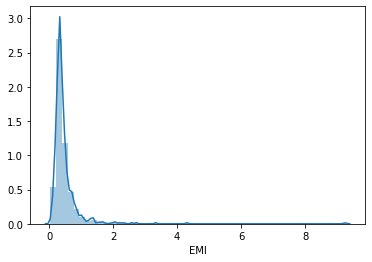

In [120]:
#lets create emi feature for now:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train["EMI"])

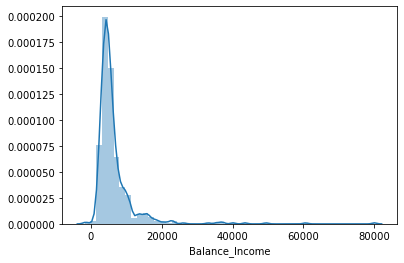

In [121]:
#create new feature balance income:
train['Balance_Income']=train['Total_Income']-(train['EMI']*1000)
test['Balance_Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance_Income'])

In [122]:
#remove the old columns so that there is low correlation:
train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)


,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance_Income
0,1.0,4.700480,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,5720,8.651724,0.305556,5414.444444
1,1.0,4.836282,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,4576,8.428581,0.350000,4226.000000
2,1.0,5.337538,0,1,0,1,0,0,0,1,...,0,1,0,0,0,1,6800,8.824678,0.577778,6222.222222
3,1.0,4.605170,0,1,0,1,0,0,0,1,...,0,1,0,0,0,1,4886,8.494129,0.277778,4608.222222
4,1.0,4.356709,0,1,1,0,0,1,0,0,...,1,1,0,0,0,1,3276,8.094378,0.216667,3059.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,4.727388,0,1,0,1,1,0,0,0,...,1,0,1,0,0,1,5786,8.663196,0.313889,5472.111111
363,1.0,4.744932,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,4867,8.490233,0.319444,4547.555556
364,1.0,4.836282,0,1,1,0,0,1,0,0,...,0,1,0,0,1,0,5243,8.564649,0.350000,4893.000000
365,1.0,5.062595,0,1,0,1,0,1,0,0,...,0,1,0,1,0,0,7393,8.908289,0.438889,6954.111111


In [126]:
X=train

In [127]:
#logistic Regression:
#model bulding 2:

i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xval=X.loc[train_index],X.loc[test_index]
    ytr,yval=y[train_index],y[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xval)
    score=accuracy_score(yval,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)
    
    pred=model.predict_proba(xval)[:,1]



1 of kfold5
accuracy_score 0.7560975609756098

2 of kfold5
accuracy_score 0.7235772357723578

3 of kfold5
accuracy_score 0.6666666666666666

4 of kfold5
accuracy_score 0.7804878048780488

5 of kfold5
accuracy_score 0.7868852459016393


In [128]:
#mean validatino accuracy from above graph is 78%

#implement the decision tree:
from sklearn import tree

i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xval=X.loc[train_index],X.loc[test_index]
    ytr,yval=y[train_index],y[test_index]
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xval)
    score=accuracy_score(yval,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)
    



1 of kfold5
accuracy_score 0.6991869918699187

2 of kfold5
accuracy_score 0.7479674796747967

3 of kfold5
accuracy_score 0.6666666666666666

4 of kfold5
accuracy_score 0.6910569105691057

5 of kfold5
accuracy_score 0.6885245901639344


In [130]:
#find the mean accoureacy for the above:
#Random Forest:
from sklearn.ensemble import RandomForestClassifier

i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xval=X.loc[train_index],X.loc[test_index]
    ytr,yval=y[train_index],y[test_index]
    model=RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xval)
    score=accuracy_score(yval,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)



1 of kfold5
accuracy_score 0.8211382113821138

2 of kfold5
accuracy_score 0.8292682926829268

3 of kfold5
accuracy_score 0.8211382113821138

4 of kfold5
accuracy_score 0.7804878048780488

5 of kfold5
accuracy_score 0.7868852459016393


In [ ]:
#find the mean accuracy for the above:
from sklearn.model_selection import GridSearchCV
paramgrid={'max_depth':list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
grid_Search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
grid_Search.fit(x_train,y_train)
GridSearchCV(cv=None,error_score='raise',
estimator=RandomForestClassifier(bootstrap=True,class_weight=None,criterion='None',max_depth=None,max_feature='auto',
                                 max_leaf_nodes=None,min_impurity_decrease=0.0,min_impurity_split=None,min_samples_leaf=1,
                                 min_samples_split=2,min_weight_fraction_leaf=0.0,n_estimator=10,n_jobs=1,oob_score=False,
                                 random_state=1,
                                 verbose=0,warm_start=false),fit_params=None,iid=True,n_njobs=1,
           param_grid={'max_depth':[1,3,5,7,11,13,17,19],'n_estimators':[1,21,41,61,81,101,121,141,161,181]},
           pre_dispatch='2*n_jobs',refit=True,return_train_score='warn',scoring=None,verbose=0)


In [138]:
grid_search.best_estimator_RandomForestClassifier(bootstrap=True,class_weight=None,criterion='None',max_depth=3,max_feature='auto',
                                 max_leaf_nodes=None,min_impurity_decrease=0.0,min_impurity_split=None,min_samples_leaf=1,
                                 min_samples_split=2,min_weight_fraction_leaf=0.0,n_estimator=10,n_jobs=1,oob_score=False,
                                 random_state=1,
                                 verbose=0,warm_start=false)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_RandomForestClassifier'

In [143]:
import pip
pip.main(['install','xgboost'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [146]:
from xgboost import XGBClassifier
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xval=X.loc[train_index],X.loc[test_index]
    ytr,yval=y[train_index],y[test_index]
    model=XGBClassifier(n_estimator=50,max_depth=4)
    model.fit(xtr,ytr)
    pred_test=model.predict(xval)
    score=accuracy_score(yval,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)
    pred3=model.predict_proba(test)[:,1]


6 of kfold5
[22:19:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy_score 0.7886178861788617

7 of kfold5
[22:19:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy_score 0.7642276422764228

8 of kfold5
[22:19:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {